In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np


# URL of the Hitters dataset
url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'

# Load the dataset
hitters_data = pd.read_csv(url)
hitters_data = hitters_data.iloc[:, 1:]

# Handle missing values (for this example, let's drop rows with missing values)
hitters_data = hitters_data.dropna()

# Assuming all other non-numeric columns are categorical, we perform one-hot encoding
hitters_data = pd.get_dummies(hitters_data, drop_first=True)

# Create a new column for the log of the salary
hitters_data['log_salary'] = np.log(hitters_data['Salary'])

# Split the data into features and target variable
X = hitters_data.drop(['Salary', 'log_salary'], axis=1)
y = hitters_data['log_salary']

In [ ]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


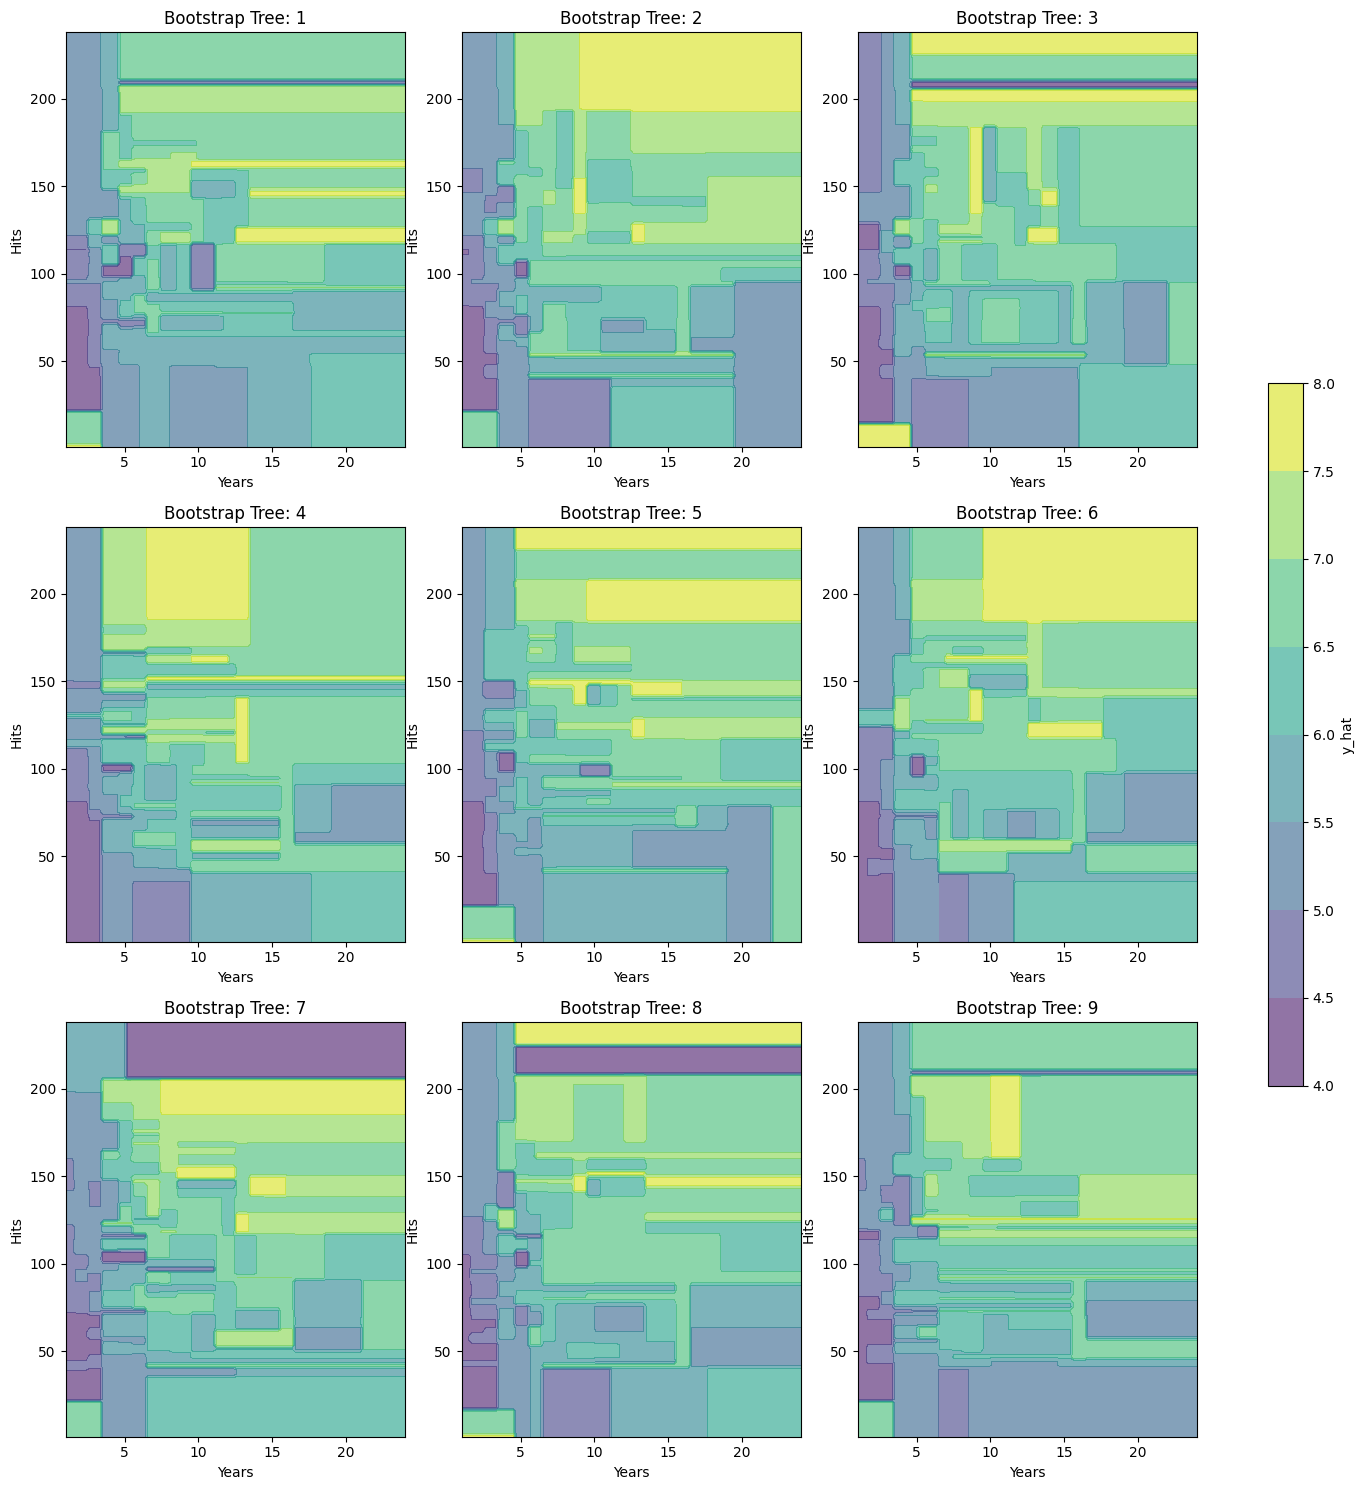

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# Select only "Hits" and "Years" from the dataset
X_subset = hitters_data[['Years', 'Hits']]

# Fit the bagging regressor on the subset of features
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=12, random_state=42)
bagging_regressor.fit(X_subset, y)

# Extract individual trees from the bagged model
trees = bagging_regressor.estimators_

# Prepare the grid for "Years" and "Hits"
years_range = np.linspace(X_subset['Years'].min(), X_subset['Years'].max(), 100)
hits_range = np.linspace(X_subset['Hits'].min(), X_subset['Hits'].max(), 100)
years_grid, hits_grid = np.meshgrid(years_range, hits_range)

# Set up the plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 subplot structure

# Plot predictions from each bootstrap tree
for i, ax in enumerate(axes.flatten()):
    if i < len(trees):  # Check if the tree exists
        # Predict y_hat using the ith tree
        y_hat = trees[i].predict(np.c_[years_grid.ravel(), hits_grid.ravel()])
        y_hat_grid = y_hat.reshape(years_grid.shape)

        # Create the contour plot on the current subplot axis
        contour = ax.contourf(years_grid, hits_grid, y_hat_grid, alpha=0.6, cmap='viridis')
        ax.set_title(f'Bootstrap Tree: {i + 1}')
        ax.set_xlabel('Years')
        ax.set_ylabel('Hits')

# Adjust layout to prevent overlap
fig.tight_layout()

# Add a color bar to the right of the subplots with modifications
cbar = fig.colorbar(contour, ax=axes.ravel().tolist(), shrink=0.5)  # Make the color bar 50% shorter
cbar.set_label('y_hat')  # Set the title of the legend to 'y_hat'

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


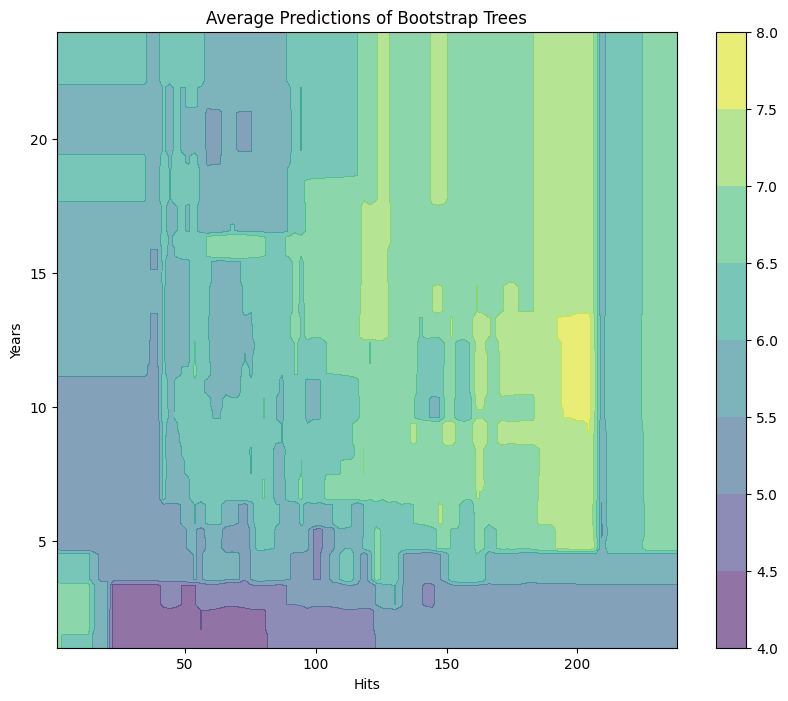

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare the data
X_subset = X[['Hits', 'Years']]  # Assuming X is your dataset

# Initialize and train the Bagging regressor
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_regressor.fit(X_subset, y)  # y is your target variable

# Create a grid for visualization
hits_range = np.linspace(X_subset['Hits'].min(), X_subset['Hits'].max(), 100)
years_range = np.linspace(X_subset['Years'].min(), X_subset['Years'].max(), 100)
hits_grid, years_grid = np.meshgrid(hits_range, years_range)

# Flatten the grid to pass into the regressor for predictions
grid_data = np.c_[hits_grid.ravel(), years_grid.ravel()]

# Predict y_hat for the grid using each tree and then average the predictions
predictions = np.array([tree.predict(grid_data) for tree in bagging_regressor.estimators_])
mean_predictions = predictions.mean(axis=0)

# Reshape the averaged predictions to match the grid shape
mean_predictions_grid = mean_predictions.reshape(hits_grid.shape)

# Create the 2D plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(hits_grid, years_grid, mean_predictions_grid, alpha=0.6, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('Hits')
plt.ylabel('Years')
plt.title('Average Predictions of Bootstrap Trees')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


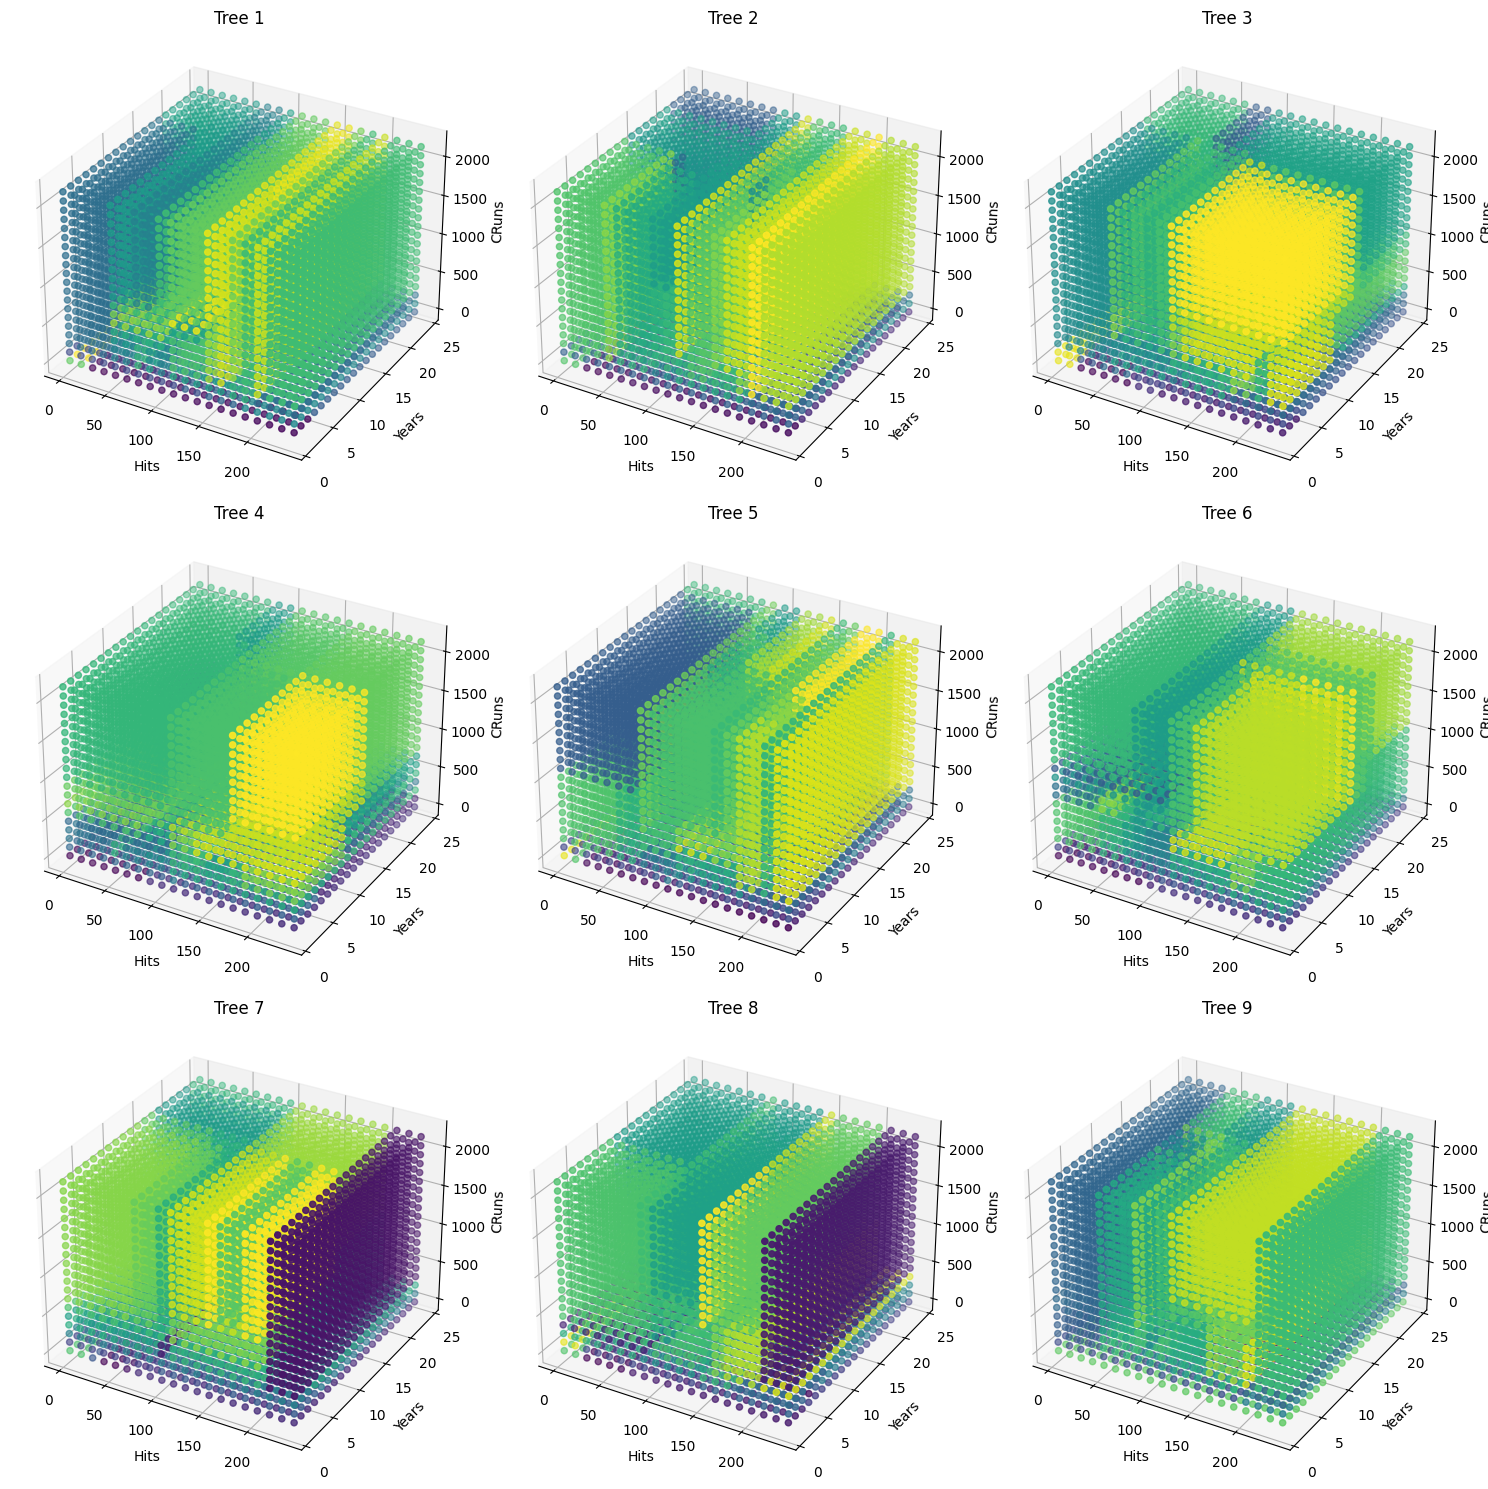

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Prepare the data (assuming you've already prepared X and y)
X_subset = X[['Hits', 'Years', 'CRuns']]
y = hitters_data['log_salary']

# Initialize and train the Bagging regressor
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=9, random_state=42)
bagging_regressor.fit(X_subset, y)

# Create a 3D grid for visualization
hits_range = np.linspace(X_subset['Hits'].min(), X_subset['Hits'].max(), 20)
years_range = np.linspace(X_subset['Years'].min(), X_subset['Years'].max(), 20)
cruns_range = np.linspace(X_subset['CRuns'].min(), X_subset['CRuns'].max(), 20)

hits_grid, years_grid, cruns_grid = np.meshgrid(hits_range, years_range, cruns_range)
grid_data = np.c_[hits_grid.ravel(), years_grid.ravel(), cruns_grid.ravel()]

# Set up a 3x3 subplot
fig, axs = plt.subplots(3, 3, subplot_kw={'projection': '3d'}, figsize=(15, 15))

for i, ax in enumerate(axs.ravel()):
    if i < len(bagging_regressor.estimators_):
        # Predict y_hat using the ith tree
        y_hat = bagging_regressor.estimators_[i].predict(grid_data)
        y_hat_grid = y_hat.reshape(hits_grid.shape)

        # 3D scatter plot
        scatter = ax.scatter(hits_grid.ravel(), years_grid.ravel(), cruns_grid.ravel(), c=y_hat, cmap='viridis')

        # Set labels and titles
        ax.set_xlabel('Hits')
        ax.set_ylabel('Years')
        ax.set_zlabel('CRuns')
        ax.set_title(f'Tree {i+1}')

# Adjust layout to prevent overlap
fig.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


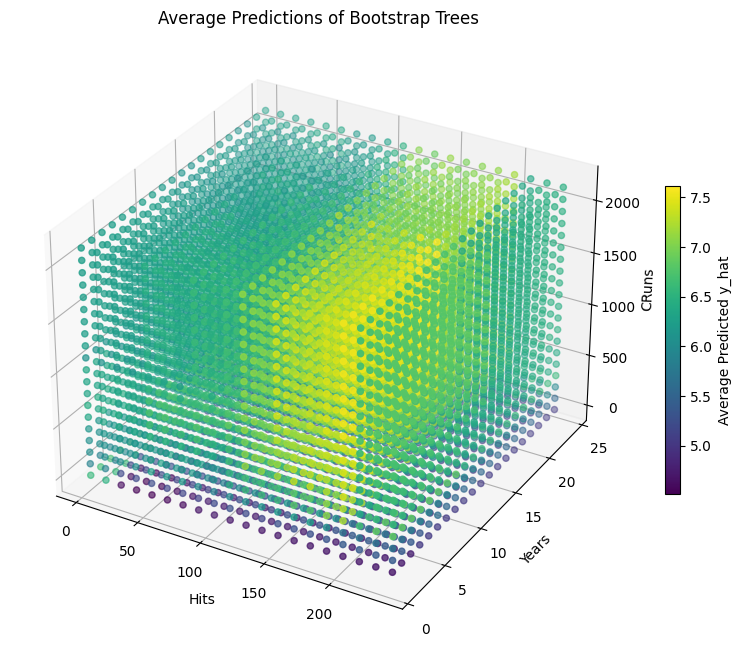

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Select the features
X_subset = X[['Hits', 'Years', 'CRuns']]  # Replace 'CRuns' with your third feature

# Initialize and train the Bagging regressor
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_regressor.fit(X_subset, y)

# Create a 3D grid for visualization
hits_range = np.linspace(X_subset['Hits'].min(), X_subset['Hits'].max(), 20)
years_range = np.linspace(X_subset['Years'].min(), X_subset['Years'].max(), 20)
cruns_range = np.linspace(X_subset['CRuns'].min(), X_subset['CRuns'].max(), 20)

hits_grid, years_grid, cruns_grid = np.meshgrid(hits_range, years_range, cruns_range)
grid_data = np.c_[hits_grid.ravel(), years_grid.ravel(), cruns_grid.ravel()]

# Predict y_hat for the grid using each tree and then average the predictions
predictions = np.array([tree.predict(grid_data) for tree in bagging_regressor.estimators_])
mean_predictions = predictions.mean(axis=0)

# Reshape the averaged predictions to match the grid shape
mean_predictions_grid = mean_predictions.reshape(hits_grid.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the averaged predictions
scatter = ax.scatter(hits_grid.ravel(), years_grid.ravel(), cruns_grid.ravel(), c=mean_predictions, cmap='viridis')

# Set labels and titles
ax.set_xlabel('Hits')
ax.set_ylabel('Years')
ax.set_zlabel('CRuns')
ax.set_title('Average Predictions of Bootstrap Trees')

# Color bar to show the prediction values
cbar = fig.colorbar(scatter, shrink=0.5)
cbar.set_label('Average Predicted y_hat')

plt.show()

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import imageio
import os

# Prepare the data and the model
X_subset = X[['Hits', 'Years', 'CRuns']]  # Replace 'CRuns' with your third feature
y = hitters_data['log_salary']  # Your target variable
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=24, random_state=42)
bagging_regressor.fit(X_subset, y)

# Create a directory to store the images
os.makedirs('plot_images', exist_ok=True)

# Generate and save each plot
filenames = []
for i, tree in enumerate(bagging_regressor.estimators_):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create a grid for visualization
    hits_range = np.linspace(X_subset['Hits'].min(), X_subset['Hits'].max(), 20)
    years_range = np.linspace(X_subset['Years'].min(), X_subset['Years'].max(), 20)
    cruns_range = np.linspace(X_subset['CRuns'].min(), X_subset['CRuns'].max(), 20)
    hits_grid, years_grid, cruns_grid = np.meshgrid(hits_range, years_range, cruns_range)
    grid_data = np.c_[hits_grid.ravel(), years_grid.ravel(), cruns_grid.ravel()]

    # Predict using the current tree
    y_hat = tree.predict(grid_data)

    # Create the 3D scatter plot
    scatter = ax.scatter(hits_grid.ravel(), years_grid.ravel(), cruns_grid.ravel(), c=y_hat, cmap='viridis')
    ax.set_xlabel('Hits')
    ax.set_ylabel('Years')
    ax.set_zlabel('CRuns')
    ax.set_title(f'Tree {i + 1}')

    # Save the plot as an image
    filename = f'plot_images/tree_{i + 1}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create a GIF from the images with infinite looping
with imageio.get_writer('trees_prediction.gif', mode='I', duration=0.5, loop=0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove the image files after creating the GIF
for filename in filenames:
    os.remove(filename)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
<ipython-input-22-7dc09b8bc890>:50: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt', # Maximum features
    max_depth=10,  # Maximum depth of each tree
    min_samples_leaf=5,  # Minimum samples at each leaf
    max_leaf_nodes=50  # Maximum number of leaf nodes per tree
)